In [1]:
import sys; print('Python %s on %s' % (sys.version, sys.platform))
sys.path.extend(['C:\\Users\\user\\PycharmProjects\\Open_Close_GNN'])

Python 3.7.16 (default, Jan 17 2023, 16:06:28) [MSC v.1916 64 bit (AMD64)] on win32


In [11]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import numpy as np
from seaborn import heatmap

In [3]:
close = loadmat(f'../data/new/raw/resultsROI_Condition001.mat')['Z']
open  = loadmat(f'../data/new/raw/resultsROI_Condition002.mat')['Z']

for i in range(84):
    np.fill_diagonal(close[:, :, i], 0)
    np.fill_diagonal(open[:, :, i], 0)

In [4]:
dl = np.array([52, 256, 53, 257, 54, 258, 55, 259])
close_ = np.zeros((84, 418, 418))
open_ = np.zeros((84, 418, 418))

for i in range(84):
    ts = np.delete(close[:, :, i], dl, 0)
    close_[i] = np.delete(ts, dl, 1)
    ts = np.delete(open[:, :, i], dl, 0)
    open_[i] = np.delete(ts, dl, 1)
    


In [ ]:
for i in range(426):
    for t in range(426):
        if open[i, t, 0] > 10:
            print(i, t)

<AxesSubplot:>

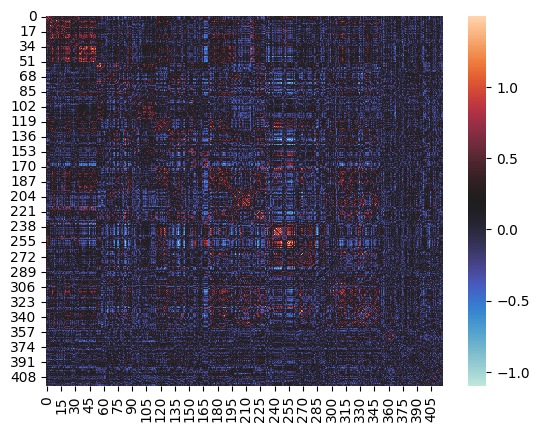

In [8]:
heatmap(open_[2], cmap='icefire')

In [6]:
open_close = np.concatenate([open_, close_])
labels = [1] * 84 + [0] * 84

In [7]:
pca = PCA(n_components=0.95)

pca.fit(open_close.reshape((168, -1)))
transformed = pca.transform(open_close.reshape((168, -1)))
transformed.shape

In [14]:
x_train, x_test, y_train, y_test = train_test_split(transformed, labels)

In [18]:
lg = LogisticRegression()
lg.fit(x_train, y_train)
lg.score(x_test, y_test)


0.8095238095238095